In [333]:
# !pip install fredapi
import fredapi as fa 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
#1. Create the fred object
ApiKey = '97c942de9e8ecd086b8ef65e88efe5de'
fred = fa.Fred(ApiKey)

In [332]:
# 2. search fred
df = fred.search('Unemployment', order_by = 'popularity'

In [19]:
tickers = {'Unemployment': 'UNRATE',
            'Wilshire5000' :'WILL5000INDFC' }

In [40]:
df = fred.search(tickers['Wilshire5000'], order_by = 'popularity')
df

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
WILL5000INDFC,"Daily, Close",D,WILL5000INDFC,2022-09-16 07:04:02-05:00,The observations for the Wilshire 5000 Total M...,2022-09-15,1970-12-31,66,2022-09-18,2022-09-18,Not Seasonally Adjusted,NSA,Wilshire 5000 Total Market Full Cap Index,Index,Index


In [213]:
# pull raw data

# DESEMPLEO
unrate = fred.get_series('UNRATE')
# WILSHIRE 5000 MENSUAL
will5000 = fred.get_series(tickers['Wilshire5000'])
will5000sum = will5000.resample('MS').mean()# resampleado a meses
#RECESIONES
recesionesUS = fred.get_series('JHDUSRGDPBR')# quaterly
recesionesUS = fred.get_series('USREC')# monthly

In [339]:
# Procesamiento datos de recesion
# el dataset de recesion son ceros y unos, indicando cuando se entra y se sale de la recesión
cambios = np.diff(recesionesUS) # obtengo los indices en los que se producen los cambios

iniciosCrisis = np.where(cambios == 1)[0] # inicio de las recesiones
finalesCrisis = np.where(cambios ==-1)
finalesCrisis = np.delete(finalesCrisis[0],0) # al final de las recesiones le tengo que quitar el primer indice, ya que devuelve un cero pero no indica cambio

# saco las 3 primeras 
for inicio, final in zip(iniciosCrisis, finalesCrisis):
    print(f'Inicio: {recesionesUS.index[inicio].strftime("%b-%Y")}\tFinal: {recesionesUS.index[final].strftime("%b-%Y")}')
    if inicio == 124:
        break

Inicio: Jun-1857	Final: Dec-1858
Inicio: Oct-1860	Final: Jun-1861
Inicio: Apr-1865	Final: Dec-1867


In [161]:
# Máximos y mínimos locales con numpy
a = np.diff(np.sign(np.diff(will5000sum))).nonzero()[0] + 1   #local min and max 
b = (np.diff(np.sign(np.diff(will5000sum))) > 0).nonzero()[0] + 1 #local min
c = (np.diff(np.sign(np.diff(unrate))) < 0).nonzero()[0] + 1         # local max

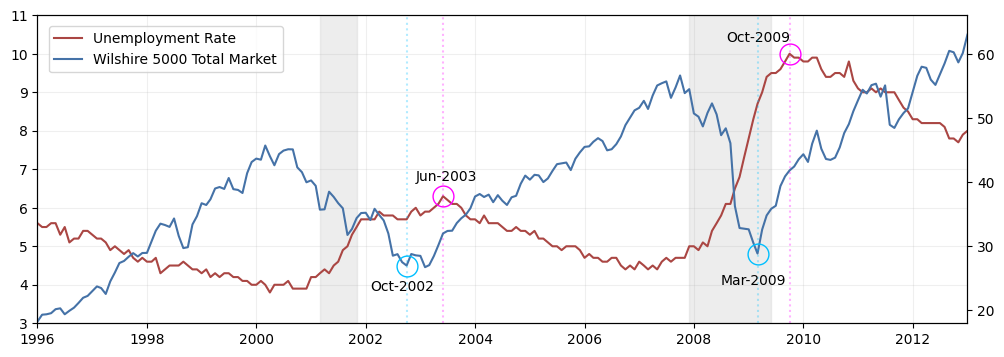

In [342]:
fig, ax1 = plt.subplots(figsize = (12,4))
ax2 = ax1.twinx()

## DESEMPLEO
ax1.plot(unrate.index, unrate.values, color = '#AA4643', label = 'Unemployment Rate')
# paro en maximos
index = [211,237]; color1 = 'fuchsia'
ax1.plot(unrate.index[c[index]], unrate.values[c[index]],linewidth=0.0,marker = 'o', fillstyle='none',markersize=15, markeredgecolor = color1 )
ax1.axvline(unrate.index[c[index[0]]], color = color1, alpha = 0.3, ls = ':' )
ax1.axvline(unrate.index[c[index[1]]], color = color1, alpha = 0.3, ls = ':' )
ax1.text(unrate.index[c[index[0]-2]], y =6.7, s = unrate.index[c[index[0]]].strftime("%b-%Y"))
ax1.text(unrate.index[c[index[1]-2]], y = 10.3, s = unrate.index[c[index[1]]].strftime("%b-%Y"))

## WILSHIRE 5000
ax2.plot(will5000sum.index, will5000sum.values, color = '#4572A7', label = 'Wilshire 5000 Total Market')
#bolsa en mínimos
index = [79,93]; color2 = 'deepskyblue'
ax2.plot(will5000sum.index[b[index]], will5000sum.values[b[index]],linewidth=0.0,marker = 'o', fillstyle='none',markersize=15, markeredgecolor = color2 )
ax2.axvline(will5000sum.index[b[index[0]]], color = color2, alpha = 0.3, ls = ':' )
ax2.axvline(will5000sum.index[b[index[1]]], color = color2, alpha = 0.3, ls = ':' )
ax2.text(will5000sum.index[b[index[0]-2]], y = 23, s = will5000sum.index[b[index[0]]].strftime("%b-%Y"))
ax2.text(will5000sum.index[b[index[1]-1]], y = 24, s = will5000sum.index[b[index[1]]].strftime("%b-%Y"))
## RECESIONES
for start, finish in zip(iniciosCrisis, finalesCrisis):
    ax1.axvspan(recesionesUS.index[start],recesionesUS.index[finish] , color = 'lightgrey', alpha = 0.4)


x1 = datetime.date(1996, 1, 1)
x2 = datetime.date(2013, 1, 1)

ax2.set_ylim([18,66])
ax1.set_ylim([3,11])
ax2.set_xlim([x1, x2])
ax1.grid(alpha = 0.2)
fig.legend(bbox_to_anchor=(0.335, .87))


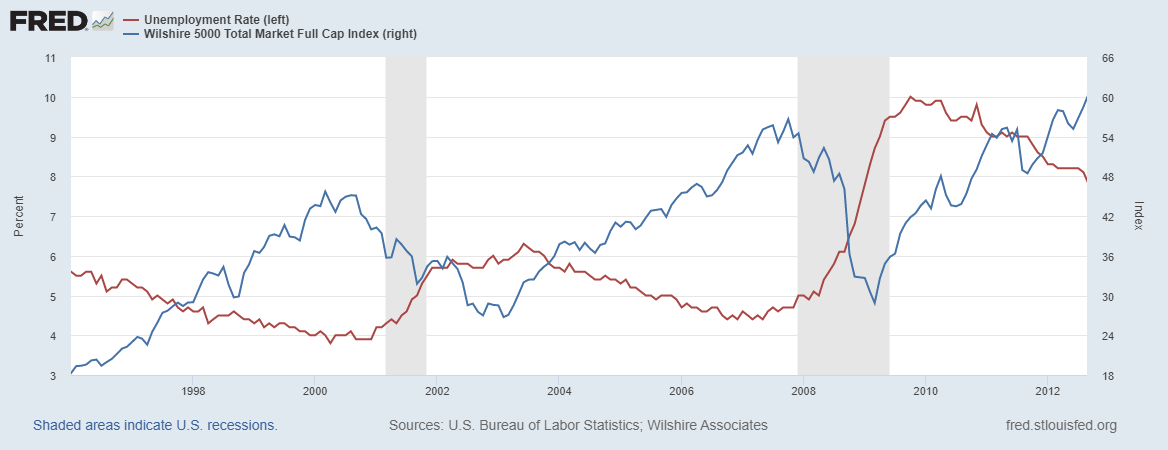

In [83]:
from IPython.display import Image
Image(filename='fredgraph01.png')

In [34]:
datetime.date(1997, 1, 1)

TypeError: descriptor 'date' for 'datetime.datetime' objects doesn't apply to a 'int' object

In [32]:
unrate.index

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', length=896, freq=None)

In [ ]:
tickers = {'Unemployment': 'UNRATE',
            'Wilshire5000' :'WILL5000INDFC' }